In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
other_path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df = pd.read_csv(other_path, header=None)
df.shape

(205, 26)

In [4]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [0]:
df.columns = headers

In [0]:
# Replacing "?" values with nan
df.replace("?",np.nan,inplace=True)
df['price'].values

In [8]:
## Evaluating missing data
data = df.copy()
missing_data = data.isnull()
#missing_data1 = data.isna()
missing_data['normalized-losses'].value_counts()
#data[50:150]

False    164
True      41
Name: normalized-losses, dtype: int64

In [0]:
# counting no of missing values present in each column
for c in missing_data.columns.values.tolist():
  print(c,':',missing_data[c].value_counts())
  print('\n')
# true denotes no of missing values in that column

symboling : False    205
Name: symboling, dtype: int64


normalized-losses : False    164
True      41
Name: normalized-losses, dtype: int64


make : False    205
Name: make, dtype: int64


fuel-type : False    205
Name: fuel-type, dtype: int64


aspiration : False    205
Name: aspiration, dtype: int64


num-of-doors : False    203
True       2
Name: num-of-doors, dtype: int64


body-style : False    205
Name: body-style, dtype: int64


drive-wheels : False    205
Name: drive-wheels, dtype: int64


engine-location : False    205
Name: engine-location, dtype: int64


wheel-base : False    205
Name: wheel-base, dtype: int64


length : False    205
Name: length, dtype: int64


width : False    205
Name: width, dtype: int64


height : False    205
Name: height, dtype: int64


curb-weight : False    205
Name: curb-weight, dtype: int64


engine-type : False    205
Name: engine-type, dtype: int64


num-of-cylinders : False    205
Name: num-of-cylinders, dtype: int64


engine-size : False    2

In [0]:
data.dtypes

In [9]:
# dropping all rows of the target variable having nan values
data.dropna(axis=0,subset=['price'],inplace=True)
data.shape
# dataset is reduced by 4 values

(201, 26)

In [0]:
data = data.reset_index(drop=True)
data['price'] = data['price'].astype("int")
#data.dtypes

In [11]:
# (normalized-losses,bore,stroke,horsepower,peak-rpm,price) all these features have data type object
# changing it to int or float
data1 = data[['normalized-losses','bore','stroke','horsepower','peak-rpm']]
for c in data.columns.values.tolist():
  if c in data1:
    data[c] = data[c].astype('float')

data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [0]:
## replacing nan values with mean or median
nor_loss_mean = data['normalized-losses'].mean(axis=0)
data['normalized-losses'].replace(np.nan,nor_loss_mean,inplace=True)

avg_bore = data['bore'].mean(axis=0)
data["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = data["stroke"].mean(axis = 0)
data["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = data['horsepower'].mean(axis=0)
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=data['peak-rpm'].mean(axis=0)
data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [0]:
## As we analyze that num-of-doors has '4' doors as the most common type
## So replace 4 with nan value
data['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [0]:
#data['num-of-doors'].value_counts().idxmax() #return the most common type
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [14]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [0]:
# Still few of the dataframe columns don't have proper data type format
data[['normalized-losses']] = data[['normalized-losses']].astype('int')
data[['horsepower']] = data[['horsepower']].astype('int')

In [0]:
## Normalizing data using min-max formula
data_normalize = ['length','height','width']
for c in data.columns.values.tolist():
  if c in data_normalize:
    data[c] = (data[c]-data[c].min())/(data[c].max()-data[c].min())


Text(0.5, 1.0, 'horsepower data distribution')

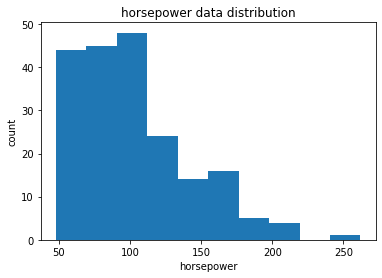

In [0]:
%matplotlib inline
plt.hist(data["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower data distribution")

In [0]:
# As we analyze the above histogram the data can be divided into 3 bins
## Bin1-(50 to 100 'high')  Bin2=(100 to 175 'medium')  Bin3-(175 to 275 'low')
## Since we are building 3 bins ther should be 4 dividers

bins = np.linspace(min(data['horsepower']),max(data['horsepower']),4)
group = ['low','medium','high']
data['horsepower-binned'] = pd.cut(data['horsepower'],bins,labels=group,include_lowest=True)
data[['horsepower','horsepower-binned']].head(50)

In [0]:
data['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

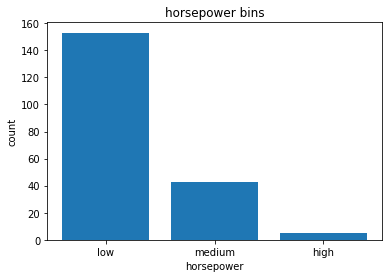

In [0]:
%matplotlib inline
plt.bar(group, data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [0]:
# Encoding columns having categorical data
#dummy_variable_1 = pd.get_dummies(df["fuel-type"])
#dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
#data = pd.concat([data, dummy_variable_1], axis=1)
#data.drop("fuel-type", axis = 1, inplace=True)

#dummy2 = pd.get_dummies(df['aspiration'])
#dummy2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
data = pd.concat([data, dummy2], axis=1)
data.drop("aspiration", axis = 1, inplace=True)

**Explaratory** **Data** **Analysis**

In [0]:
import seaborn as sns

In [0]:
# to get correlation between diffrent column variables
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,-0.035527,0.036233,-0.082391,-0.094765,0.094765,0.038032,-0.038032
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,0.038362,-0.038362,-0.107277,0.107277
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,-0.470606,-0.543304,0.584642,0.285960,-0.285960,-0.163389,0.163389
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,-0.665192,-0.698142,0.690628,0.226455,-0.226455,-0.110308,0.110308
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,-0.633531,-0.680635,0.751265,0.262905,-0.262905,-0.170757,0.170757
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,-0.049800,-0.104812,0.135486,0.129076,-0.129076,-0.039314,0.039314
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,-0.749543,-0.794889,0.834415,0.227570,-0.227570,-0.148301,0.148301
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,-0.650546,-0.679571,0.872335,0.170846,-0.170846,-0.114392,0.114392
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,-0.582121,-0.591390,0.543154,0.076091,-0.076091,-0.051904,0.051904
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,-0.034079,-0.034741,0.082267,-0.064253,0.064253,0.095755,-0.095755


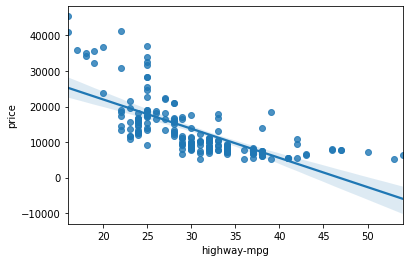

In [0]:
# To obtain relationship between two variables by plotting a regplot
sns.regplot(x="highway-mpg",y="price",data=data)
# If we obtain a positive/negative i.e inverse relationship between any 
# two variables(x,y) then x can be potential predictor of y

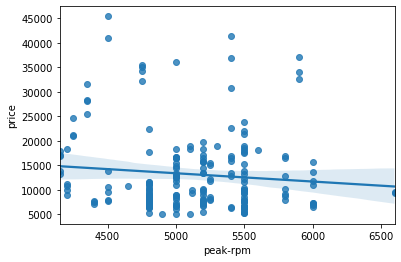

In [0]:
sns.regplot(x="peak-rpm",y="price",data=data)
# If the regression line is close to horizontal line then
# x is said to be not a good predictor of y

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


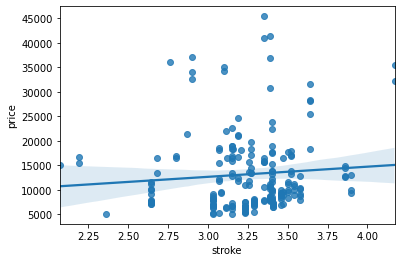

In [0]:
sns.regplot(x="stroke",y="price",data=data)
data[['stroke','price']].corr()
## as the correlation between stroke and price is very much close to 0
## we can say that stroke is not a good predictor for price

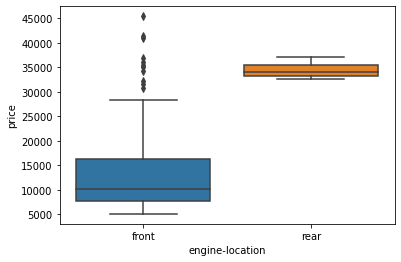

In [0]:
# To visualize categorical variables we can use boxplots
sns.boxplot(x="engine-location",y="price",data=data)
## Here we see that the distribution of price
## between these two engine-location categories, front and rear,
## are distinct enough to take engine-location as a potential 
## good predictor of price.

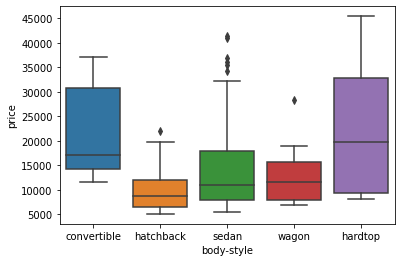

In [0]:
sns.boxplot(x="body-style",y="price",data=data)
## We see that the distributions of price between the different body-style
## categories have a significant overlap,so body-style 
## would not be a good predictor of price

In [0]:
drive_wheels_counts = data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [0]:
## Groupimg of one of more variables and target variable
data_group1 = data[['drive-wheels','body-style','price']]
grp1 = data_group1.groupby(['drive-wheels','body-style'],as_index=False).mean()
grp1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [0]:
# Grouping by pivot table
grp1_pivot = grp1.pivot(index='body-style',columns='drive-wheels')
grp1_pivot

#grp1_pivot = grp1_pivot.fillna(0) #fill missing values with 0
#grp1_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

In [0]:
from scipy import stats

#calculate the Pearson Correlation Coefficient and P-value
# of 'wheel-base' and 'price'.

pearson_coef, p_value = stats.pearsonr(data['wheel-base'], data['price'])
print('pearson_coef',pearson_coef)
print('p_value:',p_value)

pearson_coef 0.584641822265508
p_value: 8.076488270733218e-20


Pearson Coeeficient:
The resulting  Pearson coefficient is a value between -1 and 1 inclusive, where:


*   1: Total positive linear correlation.
*   0: No linear correlation, the two variables most likely do not affect each other.

*   -1: Total negative linear correlation.


Pvalue:


*   p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

*   the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
*   the p-value is  <  0.1: there is weak evidence that the correlation is significant.











In [0]:
data_coeff = ['horsepower','length','width','height','curb-weight','engine-size','bore','city-mpg','highway-mpg','compression-ratio','stroke','compression-ratio']
for c in data.columns.values.tolist():
  if c in data_coeff:
    print(c)
    pearson_coef, p_value = stats.pearsonr(data[c], data['price'])
    print('pearson_coef',pearson_coef)
    print('p_value:',p_value)
    print('\n')

length
pearson_coef 0.6906283804483639
p_value: 8.016477466159328e-30


width
pearson_coef 0.7512653440522674
p_value: 9.200335510481516e-38


height
pearson_coef 0.13548630756805974
p_value: 0.055146273251013435


curb-weight
pearson_coef 0.8344145257702843
p_value: 2.189577238894065e-53


engine-size
pearson_coef 0.8723351674455185
p_value: 9.265491622198389e-64


bore
pearson_coef 0.5431537659807734
p_value: 8.051208825441016e-17


stroke
pearson_coef 0.08226709992212355
p_value: 0.2456287282114257


compression-ratio
pearson_coef 0.07110732668194145
p_value: 0.3158110188729282


horsepower
pearson_coef 0.8097290352560285
p_value: 5.924001027593172e-48


city-mpg
pearson_coef -0.6865710067844678
p_value: 2.321132065567641e-29


highway-mpg
pearson_coef -0.704692265058953
p_value: 1.7495471144476358e-31




Imp Variables

*  **Categorical var**

*   Drive-wheels

*   **Continuous Numerical var**

*   Length
*   Width


*   Curb-weight


*   Horsepower


*   Bore

*   Wheel-base
*   Highway-mpg

*   Engine size








**Model Developement**

In [0]:
## Linear and multiple linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [0]:
# Simple linear regression
X = data[['highway-mpg']]
Y = data['price']
lr.fit(X,Y)
lr.intercept_
lr.coef_
yhat = lr.predict(X)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [0]:
# Multiple linear regression
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lr.fit(Z,Y)
lr.intercept_
lr.coef_
yhat = lr.predict(Z)
yhat[0:5]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778])

In [0]:
# Model evaluation using visualization
import seaborn as sns

**Regression Plot**: When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

(0.0, 48181.371950790824)

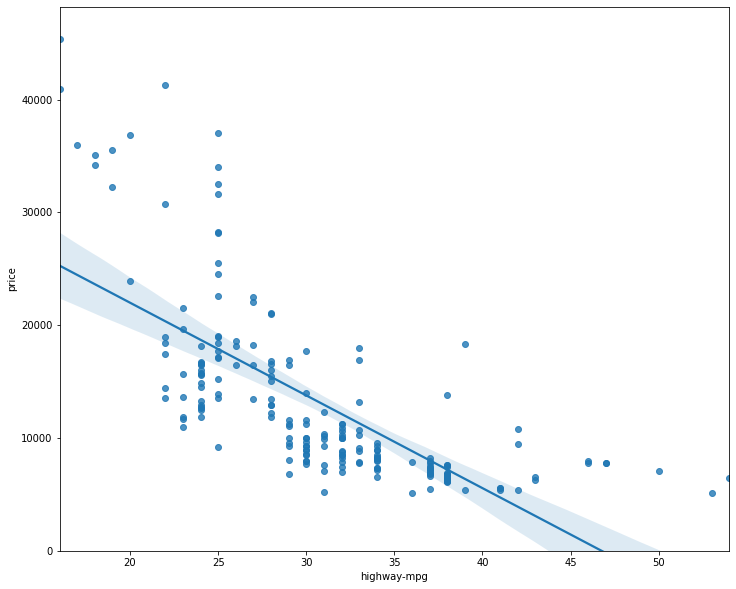

In [0]:
%matplotlib inline
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=data)
plt.ylim(0,)

**Residual Plot**: A good way to visualize the variance of the data is to use a residual plot.

*   The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e).
*   A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

*    If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.






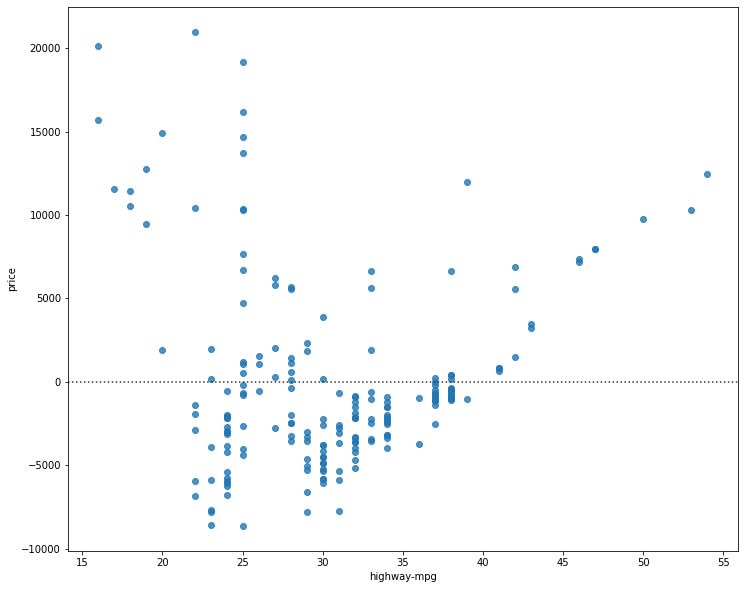

In [0]:
%matplotlib inline
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(data['highway-mpg'],data['price'])
plt.show()

**Visualizing Multiple linear regression model**

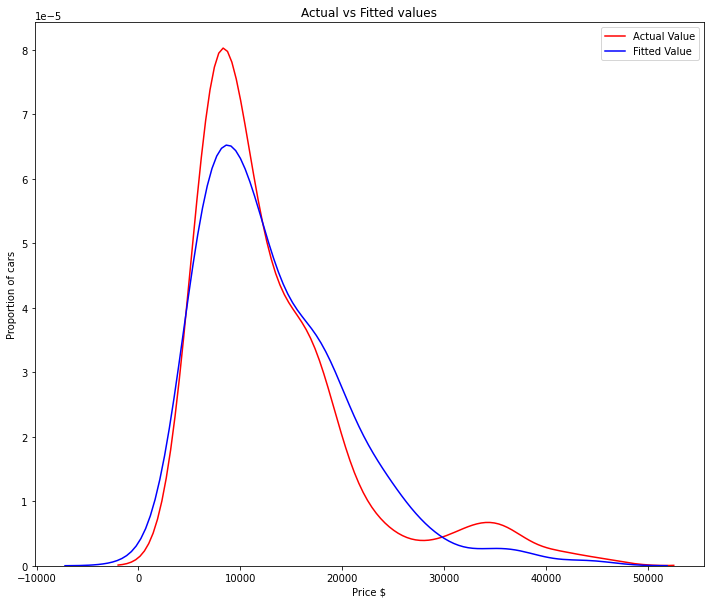

In [0]:
# Using distribution plot
%matplotlib inline
width = 12
height = 10
plt.figure(figsize=(width,height))
ax1 = sns.distplot(df['price'],hist=False,color="r",label="Actual Value")
sns.distplot(yhat,hist=False,color="b",label="Fitted Value",ax=ax1)

plt.title('Actual vs Fitted values')
plt.xlabel("Price $")
plt.ylabel('Proportion of cars')

plt.show()
plt.close()

**Pipelines**

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [0]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
pipe.fit(Z,Y)

In [0]:
ypipe = pipe.predict(Z)
ypipe[0:5]

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982,
       16132.61710554])



*  **R-squared**

   R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model
*   **Mean Squared Error (MSE)**


   The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).



In [0]:
# calculate r square
print('The r-square is:',lr.score(Z,Y))

The r-square is: 0.8094390422815301


In [0]:
# calculate mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data['price'],yhat)
print('Mean square error is:',mse)

Mean square error is: 11975165.993303545


**Model evaluation and refinement**

In [0]:
data1 = data.copy()
y_data = data1['price']
x_data = data1.drop('price',axis=1)

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1)

In [0]:
# Creating a Multi linear regr model 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [26]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11459.27808421,  5966.8378596 , 11310.97857261,  6838.76419597,
       15766.31481845])

In [0]:
import seaborn as sns
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title):
  width = 10
  height = 10
  plt.figure(figsize=(width,height))

  ax1 = sns.distplot(RedFunction,hist=False,color='r',label=RedName)
  ax2 = sns.distplot(BlueFunction,hist=False,color='b',label=BlueName)

  plt.title(Title)
  plt.xlabel('Price $')
  plt.ylabel('Proportion of cars')

  plt.show()
  plt.close()

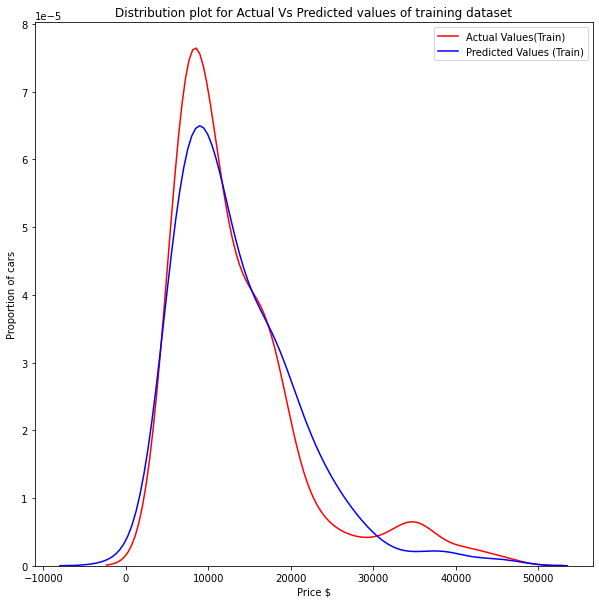

In [36]:
DistributionPlot(y_train,yhat_train,"Actual Values(Train)","Predicted Values (Train)","Distribution plot for Actual Vs Predicted values of training dataset")

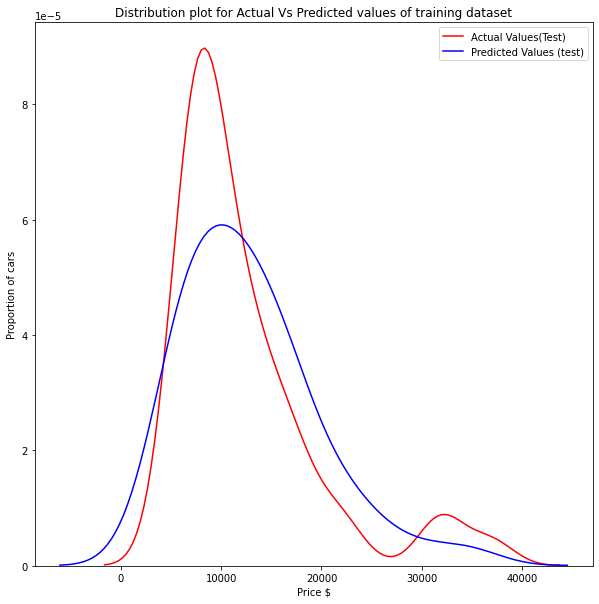

In [37]:
DistributionPlot(y_test,yhat_test,"Actual Values(Test)","Predicted Values (test)","Distribution plot for Actual Vs Predicted values of training dataset")

In [0]:
## Performing polynomial regression on data for diffrent order polynomial
from sklearn.preprocessing import PolynomialFeatures
Rsq_test = [] # Stores r square value of test data for diffrent order polynomial
order = [1,2,3,4]
for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
  x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
  lr.fit(x_train_pr,y_train)
  Rsq_test.append(lr.score(x_test_pr,y_test))


Text(0, 0.5, 'R square')

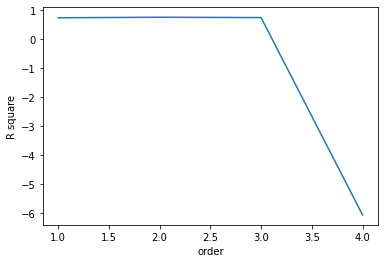

In [40]:
plt.plot(order,Rsq_test)
plt.xlabel('order')
plt.ylabel('R square')


**Grid Search**

*   The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.




In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameter = [{'alpha':[0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

RR = Ridge()
Grid = GridSearchCV(RR,parameter,cv=4)

Grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
##The object finds the best parameter values on the validation data.
## We can obtain the estimator with the best parameters and assign it
## to the variable BestRR
BestRR = Grid.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
#We now test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7720087470492013